In [38]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore") 
sns.set_style("darkgrid", {"grid.color": ".6", 
                           "grid.linestyle": ":"})
 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import Lasso
 
from sklearn.ensemble import RandomForestRegressor 
# from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

data = pd.read_csv('/Users/thutranghoa/Code/Data_analysis/Data/data_cleaned.csv')
data.head(10)

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,1.065352e+07,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1.909812e+06,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,3.309358e+07,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,1.728400e+07,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7.798899e+06,1.134999,5.131676e+06
5,BGD,1991,2585.7,0.004491,154.496130,116.511476,15940.449,0.147913,196.135682,9.443704,1.537922,3.095744e+10,300.0,137.9,2.359199,1.077687e+08,4.260207,2.174773e+07
6,BGR,1991,3990.0,0.510803,367.387480,2560.054449,59706.094,6.916832,992.618530,13.789261,2.416870,1.094355e+10,1620.0,22.3,-0.991363,8.632000e+06,-0.570562,5.755818e+06
7,BOL,1991,1358.0,0.973189,124.898118,394.957523,5779.192,0.848156,268.213775,25.655982,8.583622,5.343259e+09,760.0,116.7,2.306643,6.813834e+06,3.664292,3.840277e+06
8,BRA,1991,1850.6,0.270783,131.112804,939.256647,219330.604,1.441571,201.231977,35.137914,10.994541,4.073378e+11,2870.0,57.1,1.654581,1.521469e+08,2.453520,1.147188e+08
9,CAN,1991,2580.7,0.480500,283.945526,7388.563674,449053.486,15.939889,612.576462,39.968292,6.016160,5.982081e+11,20420.0,8.0,1.360506,2.817168e+07,1.647301,2.164149e+07


In [9]:
data.shape

(1700, 18)

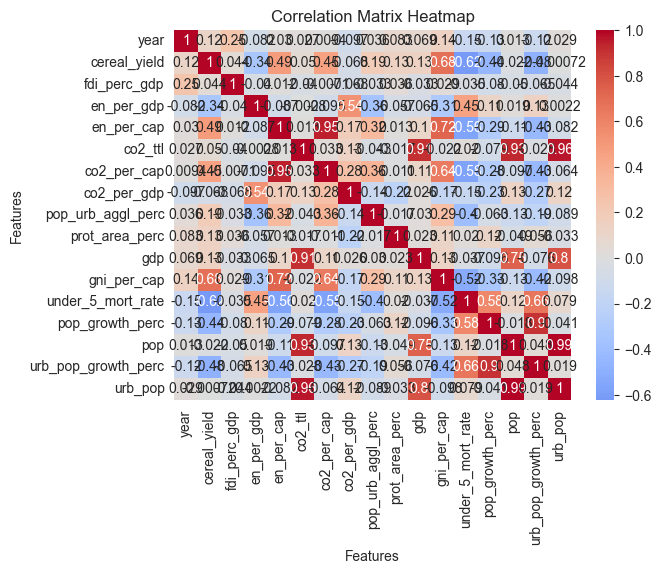

In [30]:
# Calculate correlation matrix

df = data.drop (['country'], axis=1)
correlation  = df.corr()
 
# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)
 
# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
# plt.yticks(rotation = 30)
 
# Show plot
plt.show()

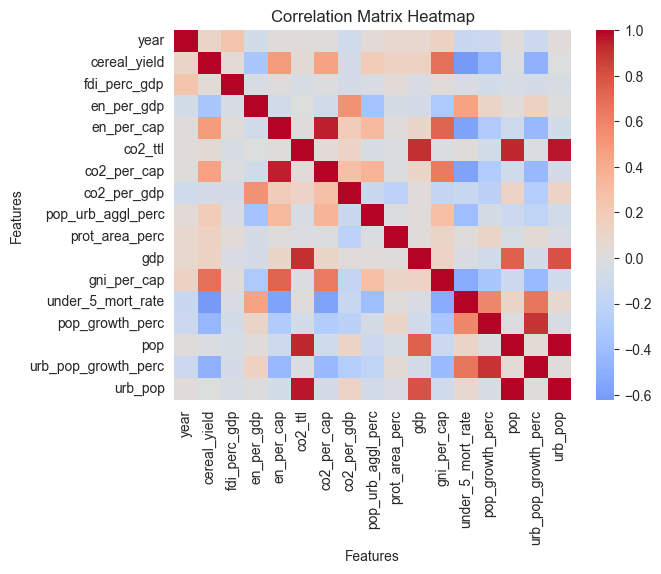

In [29]:
df = data.drop (['country'], axis=1)
correlation  = df.corr()
 
# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=False)
 
# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
# plt.yticks(rotation = 10)
 
# Show plot
plt.show()

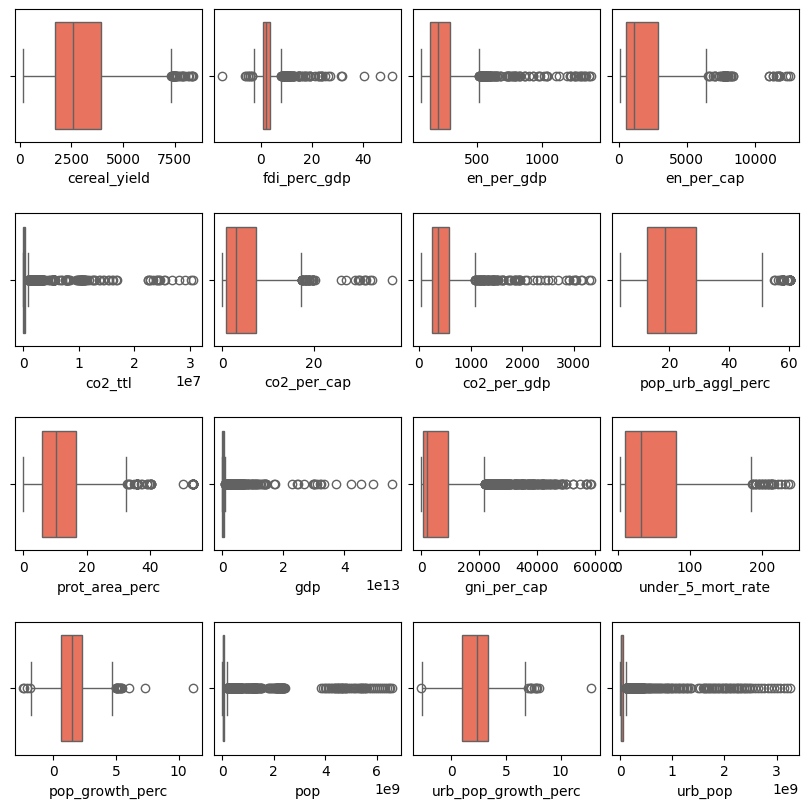

In [11]:
fig = plt.figure(figsize=(8, 8))
temp = data.drop(['country', 'year'], axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data=data, x=item, color='tomato')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [12]:
def outlier_removal(column):
    # Capping the outlier rows with Percentiles
    upper_limit = column.quantile(.95)
    # set upper limit to 95percentile
    lower_limit = column.quantile(.05)
    # set lower limit to 5 percentile
    column.loc[(column > upper_limit)] = upper_limit
    column.loc[(column < lower_limit)] = lower_limit
    return column

In [49]:
# select the features and target variable
# X = data.drop(['en_per_gdp', 'co2_per_gdp', 'under_5_mort_rate', 'pop', 'urb_pop', 'country', 'year', 'co2_per_cap'], axis=1)
X = data.drop (['co2_per_cap', 'country', 'year'], axis= 1)
 
y = data['co2_per_cap']
# dividing dataset in to train test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
X

,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,417.4,5.449515,179.271884,565.451027,4367.397,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06
1,1594.0,0.076475,245.977706,12262.388130,57010.849,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06
2,2666.1,1.285579,173.122857,1434.960601,117021.304,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07
3,1603.3,1.306912,208.686644,4926.727783,281530.258,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07
4,5463.0,0.209142,128.939160,3381.073790,65888.656,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,5064.2,10.611056,266.177197,694.872260,127384.246,573.242319,12.016197,6.166789,9.027376e+10,920.0,25.2,1.064356,85122300.0,2.803530,2.369805e+07
1696,939.1,5.775544,142.167696,320.226397,23384.459,458.830121,9.356326,0.520661,2.691736e+10,970.0,81.1,3.049598,22626595.0,4.960694,6.932789e+06
1697,4055.3,3.503662,320.191041,3074.597450,435877.955,930.310881,33.234023,6.859550,2.752787e+11,5860.0,65.6,1.104057,48793022.0,1.897450,2.963688e+07
1698,771.5,14.798970,1193.887219,356.023405,2816.256,151.165020,17.352516,9.986567,1.166838e+10,160.0,174.4,2.763286,62474901.0,4.605834,2.121648e+07


In [51]:
scaler = StandardScaler()
 
# Fit the StandardScaler on the training dataset
scaler.fit(x_train)
 
# Transform the training dataset
# using the StandardScaler
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [52]:
from xgboost import XGBRegressor

# Create an instance of the XGBRegressor model
model_xgb = XGBRegressor()
 
# Fit the model to the training data
model_xgb.fit(x_train_scaled, y_train)
 
# Print the R-squared score on the training data
print("Xgboost Accuracy =", r2_score(
    y_train, model_xgb.predict(x_train_scaled)))

Xgboost Accuracy = 0.9999847026842086


In [54]:
# Print the R-squared score on the test data
print("Xgboost Accuracy on test data =",
      r2_score(y_test,
               model_xgb.predict(x_test_scaled)))

Xgboost Accuracy on test data = 0.9918383995049127


In [57]:
'without scale'
model_xgb = XGBRegressor()
 
# Fit the model to the training data
model_xgb.fit(x_train, y_train)
 
# Print the R-squared score on the training data
print("Xgboost Accuracy =", r2_score(
    y_train, model_xgb.predict(x_train)))

print("Xgboost Accuracy on test data =",
      r2_score(y_test,
               model_xgb.predict(x_test)))

Xgboost Accuracy = 0.9999840692084841
Xgboost Accuracy on test data = 0.9918370542142619


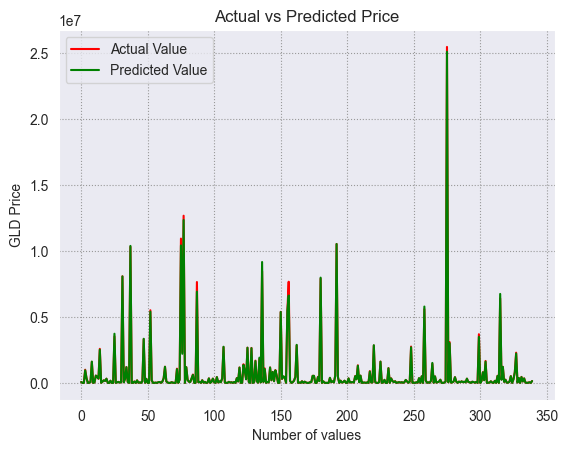

In [23]:
y_test = list (y_test)

plt.plot(y_test, color='red', label = 'Actual Value')
plt.plot(model_xgb.predict(x_test_scaled), color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()